<a href="https://colab.research.google.com/github/JoaquinV13/APRENDIZAJE_AUTOMATICO_23_24/blob/main/AA_PRACTICA3_GRUPO_A09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 3

**Asignatura:** Aprendizaje automático

**Profesor:** Carlos Rabazo

**Grupo:** A09

**Integrantes:** Joaquin Vilaplana Lopez y Adrán García-Arroba Romero

# Introducción

Se procede a construir un modelo de red convolucional de tal forma que pueda predecir con la mejor exactitud posible la clase a la que pertenece cada una de las 10 mil imágenes de test. Estas imágenes se encuentran en una base de datos conocida como Cifar-100 la cual se compone de 50 mil imágenes de entrenamiento y 10 mil de test. Cada una de estas imágenes es de 32x32 píxeles y se encuentra a color, por tanto, tienen cada una tres dimensiones teniendo encuenta que la formación de colores es en el formato RGB.

Cada imagen se encuentra etiquetada en una de las cien etiquetas que existen dentro de la base de datos. Además, existen veinte etiquetas, super clases, que engloban a estas cien. En cada super clase hay 5 clases y en cada clase hay 500 imágenes.

In [ ]:
# Se inicializan librerías necesarias
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense, MaxPooling2D, Conv2D, BatchNormalization


import matplotlib.pyplot as plt
import numpy as np

# Se comprueba versión tensorflow.
import tensorflow as tf

print(tf.__version__)

2.14.0


Índice que se va a seguir en esta memoria.

In [ ]:
from tabulate import tabulate

# Se definen los nombres de las secciones
secciones = [
    "Definir el problema y montar un conjunto de datos",
    "Elegir una medida del éxito",
    "Decidir un protocolo de evaluación",
    "Preparación de los datos",
    "Desarrollar un modelo que lo haga mejor que un modelo de referencia",
    "Ampliación: desarrollar un modelo con sobreajuste",
    "Regularización del modelo y ajuste de los hiperparámetros"
]

# Se crear una lista con números del 1 al 7 para enumerar las secciones
numeros_secciones = list(range(1, 8))

# Se crea una lista de listas con los números y los nombres de las secciones
tabla_data = list(zip(numeros_secciones, secciones))

# Se crea la tabla utilizando tabulate
tabla = tabulate(tabla_data, headers=["Número", "Sección"], tablefmt="grid")

# Se imprime la tabla
print(tabla)

+----------+---------------------------------------------------------------------+
|   Número | Sección                                                             |
+==========+=====================================================================+
|        1 | Definir el problema y montar un conjunto de datos                   |
+----------+---------------------------------------------------------------------+
|        2 | Elegir una medida del éxito                                         |
+----------+---------------------------------------------------------------------+
|        3 | Decidir un protocolo de evaluación                                  |
+----------+---------------------------------------------------------------------+
|        4 | Preparación de los datos                                            |
+----------+---------------------------------------------------------------------+
|        5 | Desarrollar un modelo que lo haga mejor que un modelo de referencia |
+---

1. DEFINIR EL PROBLEMA Y MONTAR UN CONJUNTO DE DATOS

**Datos de Entrada:** Imágenes en color de 32x32 píxeles con tres canales (rojo, verde, azul).

**Objetivo:** Clasificar las imágenes en una de las 100 categorías del conjunto de datos CIFAR-100.

**Tipo de Problema:** Clasificación multiclase.

**Caracterizar entradas y salidas:**

Entradas (X): Imágenes de 32x32 píxeles con información de color.

Salidas (Y): Etiquetas de clase que indican a qué categoría pertenece cada imagen.

**Hipótesis:**

Las salidas pueden predecirse con las entradas dadas, asumiendo que hay patrones y características distintivas en las imágenes que permiten la clasificación.
Los datos son informativos, lo que significa que las imágenes contienen suficiente información para que el modelo aprenda la relación entre las entradas y las salidas.

**Modelo Operativo:** Utilizaremos un modelo de Red Neuronal Convolucional (CNN) en Keras, ya que las CNN son efectivas para tareas de clasificación de imágenes.

**Problemas sin Solución:** No enfrentamos problemas "no estacionarios" en este contexto, ya que estamos trabajando con imágenes de un conjunto de datos fijo.

In [ ]:
# Se procede a cargar la base de datos solo teniendo en cuenta las etiquetas
# finas, las clases.



(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar100.load_data(label_mode="fine")

print ('\nDimensión de las imágenes de entrenamiento:',train_images.shape)
print ('Dimensión de las etiquetas de entrenamiento:',train_labels.shape)

print ('Dimensión de las imágenes de test:',test_images.shape)
print ('Dimensión de las etiquetas de test:',test_labels.shape)

169001437/169001437 [==============================] - 4s 0us/step

Dimensión de las imágenes de entrenamiento: (50000, 32, 32, 3)
Dimensión de las etiquetas de entrenamiento: (50000, 1)
Dimensión de las imágenes de test: (10000, 32, 32, 3)
Dimensión de las etiquetas de test: (10000, 1)


Como se dijo, se tienen 50 mil imágenes de test y 10 mil de prueba de 32x32 píxeles y a color, 3 matrices, R-G-B, por cada imágenes, por tanto, un tensor de 4 dimensiones.
Por otro lado, también se comprueba que haya el mismo número de etiquetas que de imágenes, hay 50 mil etiquetas para las 50 mil imágenes de entrenamiento y 10 mil etiquetas para las 10 mil imágenes de prueba.

A continucación, se procede a representar las 10 primeras imágenes del conjunto Cifar-100 junto con su clase correspondiente.

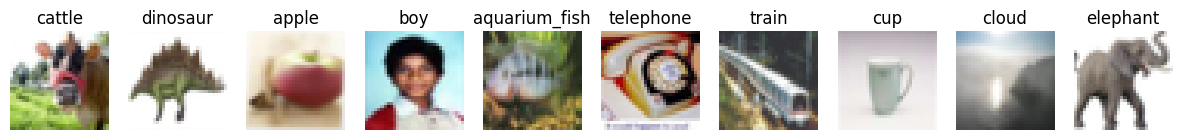

In [ ]:
# Definir las clases correspondientes al conjunto de datos CIFAR-100
fine_classes = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup',
    'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house',
    'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man',
    'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
    'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew',
    'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower',
    'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

# Imprimir las 10 primeras imágenes y sus clases
plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_images[i])
    plt.title(fine_classes[train_labels[i][0]])
    plt.axis('off')

plt.show()

Posteriormente, se comprueba que haya el mismo número de imágenes por clase, como se dijo al principio de la práctica, este número era de 500 imágenes por clase.

2. ELEGIR UNA MEDIDA DEL ÉXITO

Como medida de éxito se tendrá en cuenta la precisión del modelo en cuanto a la proporción de imágenes que es capaz de reconocer correctamente en los datos de test. Como este problema es un problema de clasificación multiclase debe comprobarse que haya la misma probabilidad de encontrar imágenes de una clase o de otra, es decir, que haya el mismo número de imágenes para cada una de las 100 clases. Como ya se dijo este número es de 500 imágenes por clase. Se procede a comprobar si los datos extraídos lo cumplen.

In [ ]:
# Contar la frecuencia de cada clase en el conjunto de entrenamiento
class_counts = dict(zip(fine_classes, np.bincount(train_labels.flatten())))

# El número de imágenes por clase.
N = 0
for class_name, count in class_counts.items():
    if count == 500:
      N = N + 1
print(N) # Número de clases con 500 imágenes.

100


Efectivamente, en cada clase hay 500 imágenes ya que hay 100 clases que tienen 500 imágenes.

3. DECIDIR UN PROTOCOLO DE EVALUACIÓN

Para el caso en el que nos encontramos, 50 mil imágenes de entrenamiento y 10 mil de test,  utilizaremos una evaluación del tipo hold-out ya que considerando que el 20% de los datos de entrenamiento representan 10 mil imágenes, se tiene como conjunto de validación un número suficiente como para poder afirmar unos valores de precisión altamente concluyentes, ya que las 10 mil imágenes de evaluación, el 20% de las imágenes de entrenamiento, son suficientes como para representar un valor estadístico significativo del conjunto de imágenes.

Por lo tanto, se utilizarán como datos de validación el 20% de las imágenes de entrenamiento.

4. PREPARACIÓN DE LOS DATOS

Los datos se encuentran en un tensor de dimensión 4. La primera dimensión hace referencia a la imagen que se esta visualizando, la segunda y tercera se refiere al número de píxeles por fila y columna y la última, hace referencia a la profundiad que al ser una imagen a color RGB, la profundidad es de 3, red, green and blue. Las redes convolucionales actíuan sobre tensores 3D donde las primeras capas aprenden elementos más superficiales, esquinas, rectas... luego las segundas capas podrán reconocer patrones mucho más específicos de esos elementos básicos de la imagen. A medida que se va profundizando en las capas convolucionales éstas son capaces de precisar más su estudio. Van de aprender cosas básicas a cada vez elementos y relaciones más complejas y específicas.

La preparación de los datos, los valores de los píxeles de cada imagen se encuentran definidos en un intervalo del 0 al 255, por tanto, se procede a normalizar estos valores para que se encuentren en un rango más bajo, del 0 al 1.

En función de la exactitud del modelo, se procederá más adelante a realizar diferentes ingenierías de características con el objetivo de evitar el sobreentrenamiento y buscar la generalidad.

In [ ]:
# Se normalizan los valores de las matrices que componen las imágenes.
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

5. DESARROLLAR UN MODELO QUE LO HAGA MEJOR QUE UN MODELO DE REFERENCIA

La probabilidad de acertar de forma aleatoria la clase de una imagen en un conjunto de imágenes de 10 mil, imágenes de test, teniendo en cuenta que en cada clase hay 100 imágenes sería: P = 100/10mil = 1/100 = 1%.

La probabilidad básica sería de un 1%, por tanto, mejorar este porcentaje ya sería un buen comienzo. Lo que se buscará es un modelo primario y a partir de éste añadir mejoras para que cada vez el modelo que obtengamos sea mejor que el anterior.

Hay que realizar diversas elecciones clave.

La primera es decidir cuál será la función de activación en la última capa. Al tratarse de una clasificación multiclase vamos a emplear una capa Dense de 100 neuroas (puesto que son las 100 posibilidades) con softmax como función de activación. La función softmax toma un vector de números y produce una dstribución de probabilidades que representan la confianza relativa de cada clase.

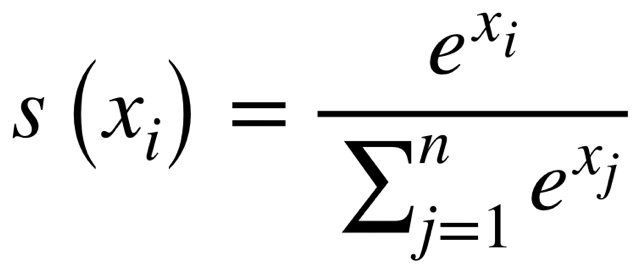

La función exponencial e^x asegura que los valores sean no negativos, y al dividir por la suma de exponenciales, se normalizan para que la suma total sea 1.

La función de pérdida debe coincidir con el tipo de problema, es por eso que vamos a emplear el sparse_categorical_crosentropy (que recibe números enteros) y luego probaremos con el categorical_crossentropy (pasando los datos al formato one-hot-encoding).

Teniendo en cuenta lo explicado en clase y prácticas anteriores el optimizador sgd se descarta y se opta por el rmsprop y el Adam.

  6 y 7. AMPLIACIÓN: DESARROLLAR UN MODELO CON SOBREAJUSTE Y REGULARIZACIÓN DEL MODELO Y AJUSTE DE LOS HIPERPARÁMETROS


Se van a explicar estos últimos dos apartados simultáneamente a medida que se vaya avanzando en el proyecto.

Se empieza con este primer modelo básico de red convolucional (CNN). Ahora se va a explicar sus diferentes partes.

Las capas Conv2D son fundamentales en una CNN. Permiten que la red aprenda patrones y características importantes en las imágenes mediante el uso de filtros convolucionales.
En este modelo, hay dos capas Conv2D. La primera tiene 32 filtros con un tamaño de kernel de (5, 5), y la segunda tiene 64 filtros también con un tamaño de kernel de (5, 5). A medida que se avanza en las capas convolucionales, la red puede aprender características más complejas.

Las capas de Max Pooling se utilizan para reducir la dimensionalidad espacial de la representación de la imagen y, al mismo tiempo, conservar las características más importantes. Ayudan a hacer que la representación sea más manejable y a reducir el costo computacional.
Después de cada capa Conv2D, hay una capa MaxPooling2D que reduce a la mitad las dimensiones espaciales de la salida de la capa convolucional.

La capa Flatten se coloca después de las capas convolucionales y de pooling para convertir la salida 2D a un vector 1D antes de conectarla a capas densas (totalmente conectadas).
En este caso, después de las capas Conv2D y MaxPooling2D, la capa Flatten se utiliza para aplanar la salida antes de pasarla a la capa densa.

La capa Dense es una capa totalmente conectada que produce la salida final de la red. En este modelo, la capa Dense tiene 100 neuronas con una función de activación softmax.
La salida tiene 100 neuronas porque, posiblemente, estás tratando con un problema de clasificación con 100 clases diferentes.

En resumen, este modelo sigue una estructura básica de CNN, comenzando con capas convolucionales para aprender características, seguido de capas de pooling para reducir dimensionalidad, y terminando con una capa densa para la clasificación.

In [ ]:
# Primer modelo.
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(100, activation='softmax'))

Se entrena el modelo y se valida con los propios datos de test. A pesar de no ser buena práctica validar con los datos de test, el siguiente modelo es un modelo muy primario el cual no se va a desarrollar más allá de lo prescindible.

Epoch 1/5
250/250 [==============================] - 13s 12ms/step - loss: 4.0309 - accuracy: 0.0965 - val_loss: 3.6197 - val_accuracy: 0.1735
Epoch 2/5
250/250 [==============================] - 2s 7ms/step - loss: 3.4431 - accuracy: 0.1997 - val_loss: 3.3233 - val_accuracy: 0.2265
Epoch 3/5
250/250 [==============================] - 2s 7ms/step - loss: 3.1373 - accuracy: 0.2531 - val_loss: 3.1093 - val_accuracy: 0.2611
Epoch 4/5
250/250 [==============================] - 2s 7ms/step - loss: 2.9285 - accuracy: 0.2951 - val_loss: 2.9460 - val_accuracy: 0.2964
Epoch 5/5
250/250 [==============================] - 2s 7ms/step - loss: 2.7741 - accuracy: 0.3276 - val_loss: 2.9447 - val_accuracy: 0.2965


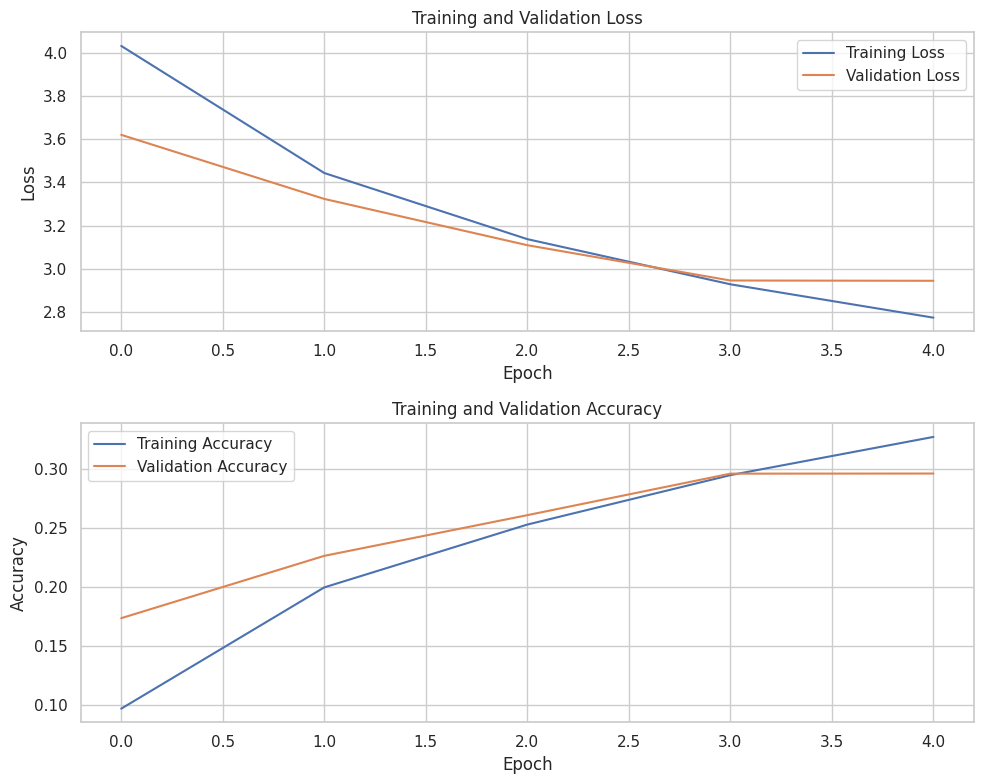

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Entrenamiento del modelo

history = model.fit(train_images, train_labels, batch_size=200, epochs=5, verbose=1, validation_data=(test_images, test_labels))

# Obtener datos de la historia del entrenamiento
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

# Crear subgráficos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Gráfico de Pérdida
ax1.plot(train_loss, label='Training Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Gráfico de Precisión
ax2.plot(train_acc, label='Training Accuracy')
ax2.plot(val_acc, label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

Se tiene que en un primer modelo básico para poder predecir el conjunto de 10 mil datos de imágenes, se consigue una predicción cerca del 30%. Cabe destacar, que la predicción en cuanto a los datos de entrenamiento está cerca del 32%.

Ahora se van a dibujar las tres funciones de activación que vamos a emplear (la ELU más tarde).

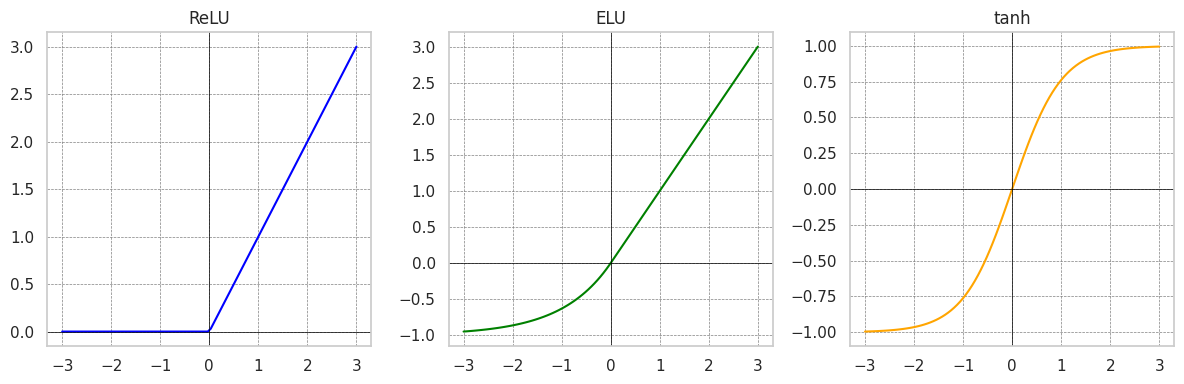

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de valores
x = np.linspace(-3, 3, 100)

# Funciones de activación
relu = np.maximum(0, x)
elu = np.where(x > 0, x, np.exp(x) - 1)
tanh = np.tanh(x)

# Crear subgráficos
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Gráfico de ReLU
axes[0].plot(x, relu, label='ReLU', color='blue')
axes[0].set_title('ReLU')
axes[0].axhline(0, color='black',linewidth=0.5)
axes[0].axvline(0, color='black',linewidth=0.5)
axes[0].grid(color = 'gray', linestyle = '--', linewidth = 0.5)

# Gráfico de ELU
axes[1].plot(x, elu, label='ELU', color='green')
axes[1].set_title('ELU')
axes[1].axhline(0, color='black',linewidth=0.5)
axes[1].axvline(0, color='black',linewidth=0.5)
axes[1].grid(color = 'gray', linestyle = '--', linewidth = 0.5)

# Gráfico de tanh
axes[2].plot(x, tanh, label='tanh', color='orange')
axes[2].set_title('tanh')
axes[2].axhline(0, color='black',linewidth=0.5)
axes[2].axvline(0, color='black',linewidth=0.5)
axes[2].grid(color = 'gray', linestyle = '--', linewidth = 0.5)

# Ajustar diseño y mostrar gráficos
plt.tight_layout()
plt.show()

En el primer modelo, se ha utilizado la función de activación 'relu' en las capas convolucionales. En el segundo modelo, se va a cambiar a 'tanh'.
Se va a agregar el argumento padding='same' en las capas convolucionales. Esto asegura que el tamaño de salida sea el mismo que el tamaño de entrada al agregar ceros en el borde si es necesario.

Se ha agregado una capa Dense con 512 unidades y activación 'relu' después de la capa Flatten.

En la segunda capa convolucional, el tamaño del kernel se ha cambiado de (5, 5) a (7, 7). Esto implica que en esa capa, se están utilizando filtros convolucionales con una ventana más grande, lo que puede ayudar al modelo a capturar patrones más complejos en los datos de entrada.

Se ha añadido una capa Dropout con una tasa del 30% después de la capa Dense. El Dropout ayuda a prevenir el sobreajuste al apagar aleatoriamente un porcentaje de unidades durante el entrenamiento.

In [ ]:
# Segundo modelo.

model = Sequential()
model.add(Conv2D(32, (5, 5), activation='tanh', input_shape=(32, 32, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (7, 7), activation='tanh', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100, activation='softmax'))

Antes de compilar y entrenar el segundo modelo, se va a realizar el One-Hot Encoding de las etiquetas de entrenamiento y prueba utilizando to_categorical de keras.utils.

También se muestra el tamaño de las etiquetas depués de haberlas pasado a one-hot encoding.

In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print (train_labels.shape)
print (test_labels.shape)

(50000, 100)
(10000, 100)


Se ha cambiado la función de pérdida a 'categorical_crossentropy' en el segundo modelo debido al uso de One-Hot Encoding.

Ahora cada etiqueta se convierte en un vector de 100 elementos ya que son 100 categorías donde en la posción que pertenece a la etiqueta a indicar ya sea la 1,2,3... se encuentra un 1 y en las demás posiciones un cero. Es decir, en la posción donde se encuentra el 1 en el vector indica la categoría que representa.

El optimizador se cambia a 'adam'.

In [ ]:
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

model.fit(train_images, train_labels,
batch_size=200,
epochs=5,
verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels)

Epoch 1/5
250/250 [==============================] - 7s 12ms/step - loss: 3.6739 - accuracy: 0.1527
Epoch 2/5
250/250 [==============================] - 3s 12ms/step - loss: 2.9759 - accuracy: 0.2774
Epoch 3/5
250/250 [==============================] - 3s 11ms/step - loss: 2.5793 - accuracy: 0.3514
Epoch 4/5
250/250 [==============================] - 3s 12ms/step - loss: 2.2740 - accuracy: 0.4162
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 2.4886 - accuracy: 0.3789


El modelo mejora pero es importante mencionar el número de épocas y el batch size. Resulta que tras muchas pruebas descubrimos que cuando el modelo entrenaba muy rápido la precisión con respecto a los datos de test disminuía considerablemente, por tanto, intentábamos siempre conseguir un modelo que no entrenara rápido, de esta forma adquiría patrones no tan específicos de los datos de entrenamiento y generalizaba mucho más que si buscabámos maximizar la precisión de entrenamiento con el objeitvo de porder obtener mejores resultados en el test. Es por ello, nos aseguramos de entrenar modelos que entrenaran muy lentos pero adquiriendo patrones más generales de los datos.

Se procede a comprobar de forma visual si con un cambio de representación de tipo polar en las imágenes conllevan alguna ventaja.

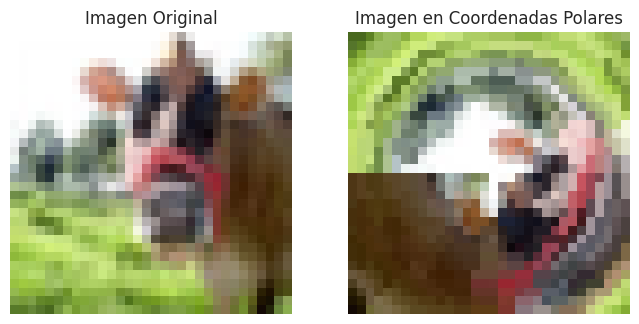

In [ ]:
# Cargar el conjunto de datos CIFAR-100
(train_images2, train_labels2), (_, _) = keras.datasets.cifar100.load_data(label_mode="fine")

# Seleccionar una imagen específica para la transformación
imagen_idx = 0
imagen_original = train_images2[imagen_idx]

# Obtener dimensiones de la imagen
alto, ancho, _ = imagen_original.shape

# Coordenadas del centro de la imagen
centro_x = ancho // 2
centro_y = alto // 2

# Crear matrices de coordenadas cartesianas
coord_x, coord_y = np.meshgrid(np.arange(ancho), np.arange(alto))

# Calcular las coordenadas polares
r = np.sqrt((coord_x - centro_x)**2 + (coord_y - centro_y)**2)
theta = np.arctan2(coord_y - centro_y, coord_x - centro_x)

# Transformar las coordenadas cartesianas a polares
r = (r / r.max()) * alto  # Ajustar el rango
theta = ((theta + np.pi) / (2 * np.pi)) * ancho  # Ajustar el rango de ángulos a [0, ancho]

# Convertir a enteros redondeando hacia abajo
r = r.astype(int)
theta = theta.astype(int)

# Mapear las coordenadas polares de nuevo a la imagen original
r = np.clip(r, 0, alto - 1)  # Asegurarse de que los índices estén en el rango válido
theta = np.clip(theta, 0, ancho - 1)
imagen_polar = imagen_original[r, theta]

# Visualizar la imagen original y la imagen transformada
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(imagen_original)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_polar)
plt.title('Imagen en Coordenadas Polares')
plt.axis('off')

plt.show()



Ya viendo un ejemplo se ve como la imagen acaba completamente distorsionada y la información no queda bien definida y, por tanto, será muy difícil que el modelo pueda reconocer patrones de cara a ser entrenado correctamente. Por este motivo, no se utilizará este tipo de representación.

A continuación, veremos diferentes tipos de transformación aplicadas al conjunto de imágenes de esta manera comprobaremos si añadiendo diferentes cambios el modelo mejora en cuanto a no sobreajustarse demasiado y generalizar más.

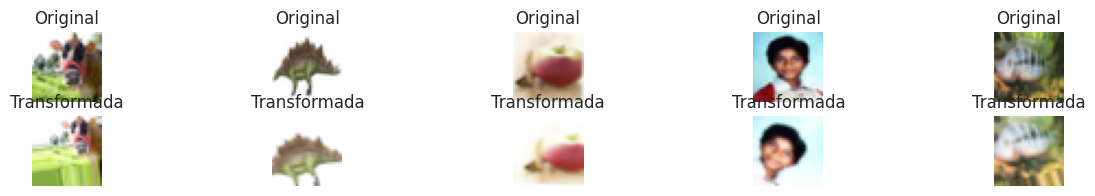

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Cargar el conjunto de datos CIFAR-100
(train_images1, train_labels1), (_, _) = keras.datasets.cifar100.load_data(label_mode="fine")

# Normalizar las imágenes al rango [0, 1]
train_images1 = train_images1.astype('float32') / 255.0


# Crear un generador de imágenes con transformaciones más intensas
datagen = ImageDataGenerator(
    rotation_range=45,      # Rango de rotación máximo en grados
    width_shift_range=0.2,  # Traslación horizontal máxima como fracción de la anchura total
    height_shift_range=0.2, # Traslación vertical máxima como fracción de la altura total
    shear_range=0.2,        # Cizalladura (shear) máxima en sentido antihorario en radianes
    zoom_range=0.3,         # Rango de zoom aleatorio
    preprocessing_function=lambda x: np.sin(x * np.pi / 2)  # Transformación seno
)

# Ajustar el generador al conjunto de datos
datagen.fit(train_images1)

# Visualizar algunas imágenes originales y transformadas
plt.figure(figsize=(15, 2))

for i in range(5):

    # Imagen original
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images1[i])
    plt.title('Original')
    plt.axis('off')

    # Imagen transformada
    plt.subplot(2, 5, i + 6)
    X_batch, _ = next(datagen.flow(train_images1[i:i + 1], train_labels1[i:i + 1], batch_size=1))
    X_batch = np.clip(X_batch, 0, 1)  # Clip para asegurar que los valores estén en el rango [0, 1]
    plt.imshow(X_batch[0])
    plt.title('Transformada')
    plt.axis('off')

plt.show()

Con estos ejemplos se puede deducir que, la luminosidad puede aportar información en cuanto a que se distinguen mejor los bordes y los contornos de los elementos de la imagen, además de difereneciar bien los colores, el problema se encuentra en aplicar una rotación a la imagen. Este problema es debido a que la red convolocional aprende patrones que se encuentran distorsionados ya que aprende de imágenes giradas y, por tanto, entenderá que los elementos estarán siempre girados para todo tipo de situación. Es por este motivo que esta transformación no es la mejor opción a no ser que procedamos a enfocarla de un modo distinto. Resulta que después de numerosas y exahustivas pruebas, llegamos a la conclusión de que la mejor forma para que el modelo no sobreentrenara y se enriqueciera de más variabilidad en los datos de entrenamiento es aplicar una cierta aleatoriedad que se va produciendo por época de entrenamiento. Esta aleatoriedad consiste en, aplicar transformaciones aleatorias al conjunto de imágenes de entrenamiento por cada época, esto hace que el modelo se entrenara con datos muy diferentes y aprendiera a reconocer que algunos a pesar de sus transformaciones implican lo mismo, es decir, una rosa girada es lo mismo que una rosa sin estar girada.

No solo eso sino que probamos el modelo añadiendo en vez de una capa convolucional dos capas con un max pooling asociado. Esto demostró una mejora significativa en nuestras pruebas.

Además, la profundida de las capas convolucionales no podía superar a dos ya que sobreentrenaba excesivamente, por tanto, solo utilizamos una o dos capas de profundidad.

Todos estos cambios conllevaron una mejora de casi el 10% de precisión llegando al 50% de precisión.

El siguiente tipo de transformación lo único que hace es dejar la imagen más nítida y la gira un ángulo de 45 grados, hace muchas menos transformaciones que la anterior.

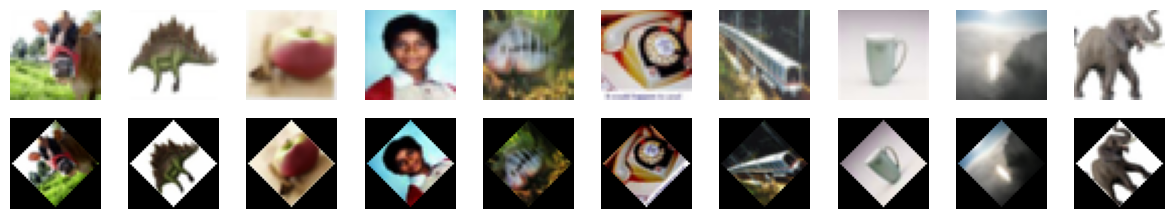

In [ ]:

#import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
from scipy import ndimage
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Función para aplicar la transformación de brillo a una imagen
def apply_first_and_second_transformations(image):
    # Cambio de brillo
    brighter_image = exposure.adjust_gamma(image, gamma=1.7)
    rotated_image = ndimage.rotate(brighter_image, angle=45)
    return rotated_image

# Imprimir las 10 primeras imágenes originales y transformadas
plt.figure(figsize=(15, 4))
for i in range(10):
    plt.subplot(3, 10, i+1)
    plt.imshow(train_images[i])
    plt.axis('off')

    # Aplicar transformación de brillo a la imagen
    transformed_image = apply_first_and_second_transformations(train_images[i])

    # Normalizar la imagen transformada
    transformed_image = np.clip(transformed_image, 0, 1)  # Asegura que los valores estén en el rango [0, 1]

    plt.subplot(3, 10, i+11)
    plt.imshow(transformed_image)
    plt.axis('off')

plt.show()

Resulta que al utilizar esta transformación, como no seguía patrones aleatorios como la anterior decidimos no utilizarla pero la consideramos relevante para un futuro modelo ya que las imágenes mejoran su calidad y se giran pudiendo estudiar mejor los bordes de la misma.

En el contexto de aprendizaje profundo y entrenamiento de modelos de redes neuronales, un "callback" es un conjunto de funciones que se ejecutan en ciertos puntos durante el entrenamiento del modelo. Los callbacks son utilizados para realizar acciones específicas, como guardar el modelo, realizar ajustes dinámicos en la tasa de aprendizaje, detener el entrenamiento prematuramente si se cumple cierto criterio, y más.

Destacamos el ModelCheckpoint, que guarda el modelo en el disco después de cada época o cuando se mejora en alguna métrica específica.

No hemos considerado de vital importancia el uso de estas funciones, por ello hemos decidido centrarnos en otras opciones como por ejemplo el Batch Normalization o el Dropout.

El problema que aborda la normalización por lotes está relacionado con lo que se conoce como el cambio de covariable interna (Internal Covariate Shift). Este cambio ocurre cuando la distribución de las activaciones de una capa varía durante el entrenamiento de la red. A medida que se actualizan los pesos durante el entrenamiento, las activaciones de una capa pueden cambiar, lo que hace que las capas posteriores tengan que adaptarse continuamente. Esto puede ralentizar el proceso de entrenamiento y hacer que sea más difícil encontrar una buena configuración de pesos.

La normalización por lotes aborda este problema normalizando las activaciones de cada capa en mini lotes durante el entrenamiento. Aquí hay algunos pasos clave de cómo funciona:

Para cada característica en el mini lote, se calcula la media y la desviación estándar. Esto se hace independientemente para cada característica a lo largo del mini lote.

Se normalizan las activaciones restando la media y dividiendo por la desviación estándar calculadas en el paso anterior. Esto centra y escala las activaciones.
Escalamiento y Desplazamiento (Scaling and Shifting):

Después de la normalización, se introducen dos nuevos parámetros (gamma y beta) por cada característica. Estos parámetros permiten a la red aprender la mejor escala y desplazamiento para las activaciones normalizadas. Esto proporciona a la red la flexibilidad de utilizar la información normalizada de manera óptima.

Durante el entrenamiento, los parámetros gamma y beta se actualizan mediante el proceso de retropropagación junto con los otros parámetros de la red.
La normalización por lotes tiene varios beneficios, entre ellos:

Al reducir el cambio de covariable interna, la normalización por lotes permite que la red converja más rápidamente.

Ayuda a estabilizar y regularizar el proceso de entrenamiento, lo que puede permitir el uso de tasas de aprendizaje más altas.

La normalización por lotes es menos sensible a las elecciones iniciales de los pesos, lo que facilita el entrenamiento de redes más profundas.

En resumen, la normalización por lotes es una técnica clave en el entrenamiento de redes neuronales que ayuda a mitigar los problemas asociados con el cambio de covariable interna, facilitando así el entrenamiento de modelos más profundos y eficientes.

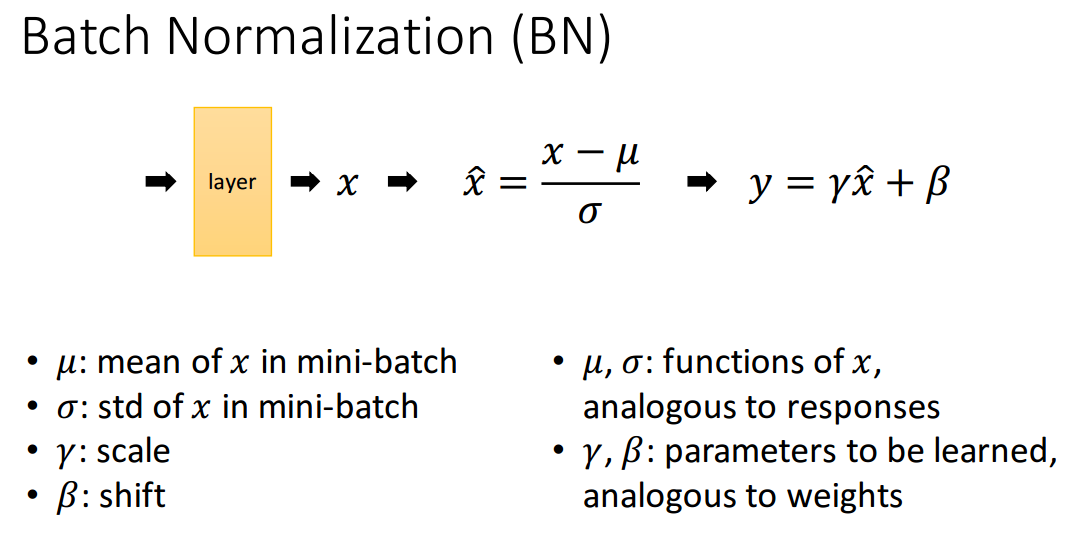

El dropout se aplica durante la fase de entrenamiento y consiste en aleatoriamente "apagar" (eliminar) un conjunto de unidades neuronales en una capa durante cada iteración del entrenamiento. Aquí te explico con más detalle

En cada iteración del entrenamiento, se elige aleatoriamente un conjunto de neuronas en una capa y se "apaga" (ignora) sus salidas. Esto significa que las salidas de esas neuronas no se utilizan en ese paso específico del entrenamiento.

Al apagar aleatoriamente neuronas en cada iteración, se introduce variabilidad en la red. Esto evita que las neuronas se vuelvan demasiado dependientes entre sí y previene la co-adaptación, donde ciertas neuronas se vuelven especializadas para ciertos patrones de datos.

Al introducir esta variabilidad, el dropout actúa como un mecanismo de regularización. Forzar a la red a aprender con una submuestra de neuronas en cada paso reduce la tendencia del modelo a memorizar ruido o características específicas del conjunto de entrenamiento que no son generalizables.
Entrenamiento de Subredes:

Puedes pensar en el dropout como el entrenamiento simultáneo de múltiples subredes, ya que en cada iteración se está entrenando efectivamente una red diferente al apagar diferentes conjuntos de neuronas. Esto ayuda a crear una representación más robusta y generalizable de los datos.
Scaling Durante la Inferencia:

Es importante mencionar que durante la fase de inferencia (cuando la red se utiliza para hacer predicciones), no se apaga ninguna neurona. Sin embargo, para mantener la coherencia en la magnitud de las salidas, las activaciones se escalan multiplicándolas por la probabilidad de retención (la probabilidad de no apagar una neurona) durante el entrenamiento.

En resumen, el dropout es una técnica de regularización poderosa que ayuda a prevenir el sobreajuste al introducir variabilidad en la red durante el entrenamiento. Al hacerlo, mejora la capacidad de generalización del modelo y ayuda a crear representaciones más robustas de los datos.

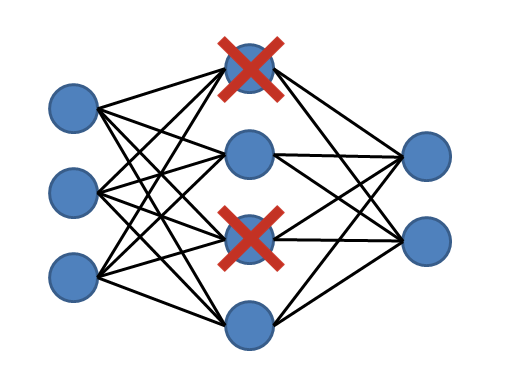


In [ ]:
# El mejor modelo. (Validación)
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Crear el modelo.
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='elu', input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='elu', input_shape=(32, 32, 3), padding='same'))

model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='elu', padding='same'))

model.add(BatchNormalization())
model.add(MaxPooling2D((4, 4)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(100, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

datagen = ImageDataGenerator(
    zoom_range=0.2,
    rotation_range = 5,
    horizontal_flip=True)

# Separamos los datos de entrenamiento de los de test, 20% de
# los datos de entrenamiento.

X_train = train_images[:40000]
X_test = train_images[40000:]
Y_train = train_labels[:40000]
Y_test = train_labels[40000:]

# Entrenar el modelo utilizando el generador de datos.
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=256),
    steps_per_epoch=len(X_train) / 256,
    epochs=100,
    verbose=1,
    validation_data=(X_test, Y_test)
)

Epoch 1/100
156/156 [==============================] - 52s 283ms/step - loss: 4.1105 - accuracy: 0.0903 - val_loss: 5.0936 - val_accuracy: 0.0230
Epoch 2/100
156/156 [==============================] - 30s 193ms/step - loss: 3.4597 - accuracy: 0.1774 - val_loss: 4.3437 - val_accuracy: 0.0712
Epoch 3/100
156/156 [==============================] - 28s 179ms/step - loss: 3.1128 - accuracy: 0.2373 - val_loss: 3.2697 - val_accuracy: 0.2152
Epoch 4/100
156/156 [==============================] - 29s 188ms/step - loss: 2.8710 - accuracy: 0.2824 - val_loss: 2.8653 - val_accuracy: 0.2821
Epoch 5/100
156/156 [==============================] - 28s 176ms/step - loss: 2.6608 - accuracy: 0.3240 - val_loss: 2.6006 - val_accuracy: 0.3384
Epoch 6/100
156/156 [==============================] - 26s 166ms/step - loss: 2.4975 - accuracy: 0.3537 - val_loss: 2.4426 - val_accuracy: 0.3753
Epoch 7/100
156/156 [==============================] - 26s 167ms/step - loss: 2.3769 - accuracy: 0.3776 - val_loss: 2.4128 -

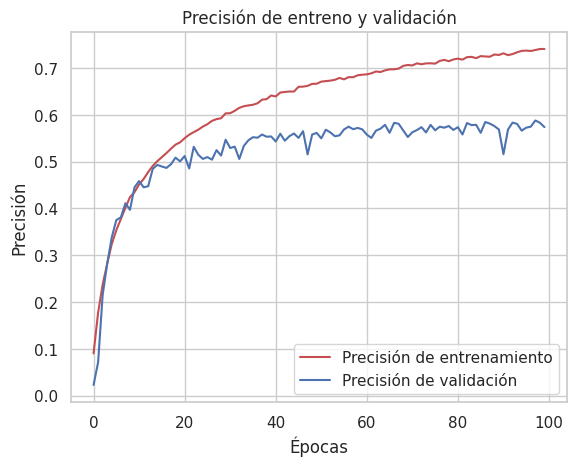

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc, 'r', label='Precisión de entrenamiento')
plt.plot(val_acc, 'b', label='Precisión de validación')
plt.title('Precisión de entreno y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

Una validación cercana al 60%. Procedemos a entrenar el modelo de nuevo ya con todos los datos de entrenamiento sabiendo que éste no se sobreentrena demasiado por lo menos hasta la época 90, teniendo en cuenta que no se reduce significativamente la precisión con los datos de test. Se escoge un número de épocas del 70 para entrenar el modelo. Se mantiene el número de batch size.

In [ ]:
# El mejor modelo. (Definitivo)

# Crear el modelo
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='elu', input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='elu', input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((4, 4)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                      

Primer Bloque:

La primera capa, utiliza un filtro de tamaño 3x3 con 3 canales de entrada y produce 64 filtros. Los parámetros para esta capa se calculan como (3 * 3 * 3 + 1) * 64, resultando en 1792 parámetros. Posteriormente, la capa batch_normalization con 64 canales de entrada contribuye con 128 parámetros. La suma total de parámetros para este bloque es de 1920.

Segundo Bloque:

La capa en este bloque utiliza un filtro de tamaño 3x3 con 64 canales de entrada, generando 64 filtros y un total de 36928 parámetros. La capa batch_normalization_1 con 64 canales de entrada contribuye con 128 parámetros. La suma total de parámetros para este bloque es de 37056.

Tercer Bloque:

En el tercer bloque, la capa utiliza un filtro de tamaño 3x3 con 64 canales de entrada para producir 128 filtros. Esto da como resultado 73856 parámetros. La capa batch_normalization_2 con 128 canales de entrada agrega 256 parámetros. La suma total de parámetros para este bloque es de 74112.

Cuarto Bloque:

La capa en el cuarto bloque utiliza un filtro de tamaño 3x3 con 128 canales de entrada para generar 128 filtros, contribuyendo con 147584 parámetros. La capa batch_normalization_3 con 128 canales de entrada suma 256 parámetros. La suma total de parámetros para este bloque es de 147840.

Quinto Bloque (Final):

El último bloque incluye capas totalmente conectadas (dense). La capa dense_1 con 2048 entradas y 256 neuronas aporta 524544 parámetros. La capa batch_normalization_4 con 256 canales de entrada añade 512 parámetros. La capa dense_2 con 256 entradas y 128 neuronas suma 32896 parámetros. La capa batch_normalization_5 con 128 canales de entrada agrega 256 parámetros. Finalmente, la capa dense_3 con 128 entradas y 100 salidas (clases) contribuye con 12900 parámetros. La suma total de parámetros para este bloque es de 568308.

Total de Parámetros en Todo el Modelo:

La suma de los parámetros de todos los bloques es de 833572, lo que proporciona el número total de parámetros para el modelo completo. Estos cálculos detallan la contribución de cada capa a la complejidad general del modelo.

In [ ]:

# Compilar el modelo
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

datagen = ImageDataGenerator(
    zoom_range=0.2,
    rotation_range = 5,
    horizontal_flip=True)

# Entrenar el modelo utilizando el generador de datos.
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=256),
    steps_per_epoch=len(train_images) / 256,
    epochs=70,
    verbose=1,
)

results = model.evaluate(test_images, test_labels)

Epoch 1/70
195/195 [==============================] - 35s 159ms/step - loss: 4.0408 - accuracy: 0.0993
Epoch 2/70
195/195 [==============================] - 31s 157ms/step - loss: 3.3317 - accuracy: 0.1979
Epoch 3/70
195/195 [==============================] - 31s 156ms/step - loss: 2.9351 - accuracy: 0.2684
Epoch 4/70
195/195 [==============================] - 31s 157ms/step - loss: 2.6513 - accuracy: 0.3225
Epoch 5/70
195/195 [==============================] - 31s 159ms/step - loss: 2.4590 - accuracy: 0.3636
Epoch 6/70
195/195 [==============================] - 32s 163ms/step - loss: 2.3150 - accuracy: 0.3933
Epoch 7/70
195/195 [==============================] - 30s 155ms/step - loss: 2.2096 - accuracy: 0.4160
Epoch 8/70
195/195 [==============================] - 31s 160ms/step - loss: 2.1053 - accuracy: 0.4390
Epoch 9/70
195/195 [==============================] - 31s 156ms/step - loss: 2.0290 - accuracy: 0.4579
Epoch 10/70
195/195 [==============================] - 30s 155ms/step - l

# Conclusión

EL mejor modelo que hemos encontrado para poder clasificar cada una de las 10 mil imágenes en 100 clases distintas mediante el uso de redes convolucionales es del 58,5% de precisión, superando con creces la probabilidad básica con la que hemos iniciado nuestro trabajo que era del 1%, posteriormente, realizando un modelo básico alcanzando cerca del 30% de precisión.

Mediante diferentes mejoras, ya siendo en cambios de hiperparámetros y en la arquitectura del modelo, además de añadir cierta variabilidad mediante la aleatoriedad de ingeniería de características con los datos de entrenamiento, se han podido hacer pruebas con mejor rendimiento hasta llegar a una la cual obteniamos la mejor precisión, cercana al 60%.